In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'darkgrid')
#import plotly.graph_objs as go
#import plotly.offline as py
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [2]:
# load data
df = pd.read_csv("heart.csv")

In [3]:
df.head()
display(df.describe())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
y = df['target']
X = df.drop(['target'], axis = 1)

In [5]:
from sklearn.model_selection import train_test_split
  
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)  


print(type(X_train))
print(type(X_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit(X_train).transform(X_train)
X_test=scaler.fit(X_test).transform(X_test)

In [7]:
cov_mat = np.cov(X_train.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('Eigen vals: {}'.format(eigen_vals))

Eigen vals: [0.29466076 0.20032191 0.13705341 0.09791866 0.09071739 0.0663127
 0.06284808 0.03938562 0.03382877 0.01080369 0.02507327 0.01542144
 0.01790505]


In [8]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [9]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key = lambda k: k[0], reverse=True)
W = np.hstack((eigen_pairs[0][1][:, np.newaxis], 
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W: \n{}'.format(W))

Matrix W: 
[[ 0.04855651  0.08610023]
 [ 0.34662568 -0.92315359]
 [-0.36123022 -0.1869333 ]
 [ 0.0199075   0.04552572]
 [ 0.00776124  0.06372183]
 [ 0.06796017 -0.02374276]
 [-0.07762723 -0.00427408]
 [-0.15390158 -0.07669358]
 [ 0.7862923   0.27430803]
 [ 0.13254135  0.04996434]
 [-0.22669608 -0.10513354]
 [ 0.11722211 -0.03609099]
 [ 0.10613145 -0.05230898]]


In [10]:
X_train_pca = X_train.dot(W)
X_test_pca = X_test.dot(W)

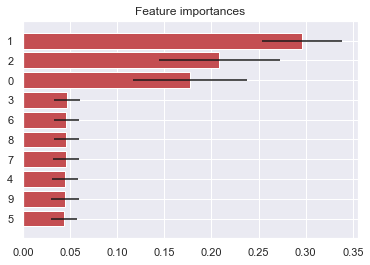

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importances[indices],
       color="r", xerr=std[indices], align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(X.shape[1]), indices)
plt.ylim([-1, X.shape[1]])
plt.show()

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train_pca, y_train)
y_pred_nb = classifier_nb.predict(X_test_pca)
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.84      0.65      0.73       123
           1       0.73      0.89      0.80       134

    accuracy                           0.77       257
   macro avg       0.79      0.77      0.77       257
weighted avg       0.79      0.77      0.77       257



Minimum error:- 0.0 at K = 1


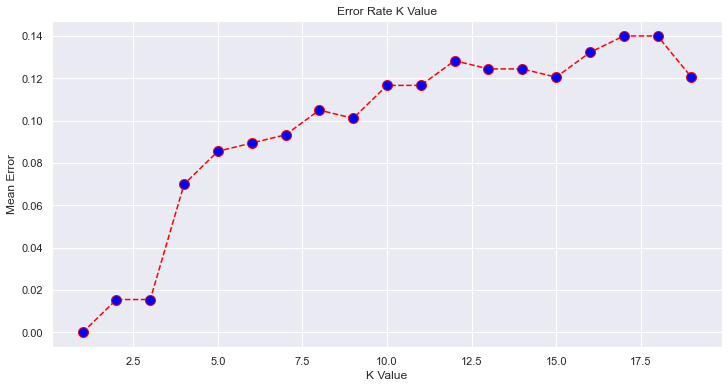

In [13]:
#looking for the optimistic k value
error = []
# Calculating error for K values between 1 and 30
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_pca, y_train)
    pred_i = knn.predict(X_test_pca)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)

In [14]:
# Running KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
classifier= KNeighborsClassifier(n_neighbors=1)  
classifier.fit(X_train_pca, y_train)
y_pred_knn= classifier.predict(X_test_pca) 

print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       123
           1       1.00      1.00      1.00       134

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



In [15]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt = dt.fit(X_train_pca, y_train)
y_pred_dt = dt.predict(X_test_pca)
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       123
           1       0.96      0.98      0.97       134

    accuracy                           0.96       257
   macro avg       0.97      0.96      0.96       257
weighted avg       0.97      0.96      0.96       257



In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg=LogisticRegression()
logreg.fit(X_train_pca,y_train)
y_pred_lr=logreg.predict(X_test_pca)

print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.83      0.67      0.74       123
           1       0.75      0.87      0.80       134

    accuracy                           0.78       257
   macro avg       0.79      0.77      0.77       257
weighted avg       0.79      0.78      0.78       257



In [17]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train_pca, y_train)
y_pred_svm = clf.predict(X_test_pca)

print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79       123
           1       0.79      0.85      0.82       134

    accuracy                           0.81       257
   macro avg       0.81      0.80      0.80       257
weighted avg       0.81      0.81      0.80       257



In [18]:
print('RandomForestClassifier')
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100) # , max_depth=5, random_state=1
model.fit(X_train_pca, y_train)
y_pred_rf = model.predict(X_test_pca)

print(classification_report(y_test,y_pred_rf))


RandomForestClassifier
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       123
           1       0.97      0.99      0.98       134

    accuracy                           0.98       257
   macro avg       0.98      0.98      0.98       257
weighted avg       0.98      0.98      0.98       257



In [19]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

def build_model():
    model = Sequential()
    model.add(Dense(200, activation='relu', input_shape=(X_train_pca.shape[1],)))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(2, activation='softmax'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model


model = build_model()
model.fit(X_train_pca, y_train, validation_data=(X_test_pca, y_test), epochs=200, verbose=2)


scores = model.evaluate(X_test_pca, y_test)
print(f'Accuracy: {scores[1]} \n Error: {1 - scores[1]}')

Epoch 1/200
24/24 - 0s - loss: 0.5668 - accuracy: 0.7500 - val_loss: 0.4506 - val_accuracy: 0.7938
Epoch 2/200
24/24 - 0s - loss: 0.5250 - accuracy: 0.7201 - val_loss: 0.4703 - val_accuracy: 0.7860
Epoch 3/200
24/24 - 0s - loss: 0.4866 - accuracy: 0.7643 - val_loss: 0.4382 - val_accuracy: 0.8132
Epoch 4/200
24/24 - 0s - loss: 0.4727 - accuracy: 0.7734 - val_loss: 0.4365 - val_accuracy: 0.8210
Epoch 5/200
24/24 - 0s - loss: 0.4715 - accuracy: 0.7617 - val_loss: 0.4386 - val_accuracy: 0.7977
Epoch 6/200
24/24 - 0s - loss: 0.4743 - accuracy: 0.7695 - val_loss: 0.4449 - val_accuracy: 0.7977
Epoch 7/200
24/24 - 0s - loss: 0.4660 - accuracy: 0.7773 - val_loss: 0.4340 - val_accuracy: 0.8288
Epoch 8/200
24/24 - 0s - loss: 0.4743 - accuracy: 0.7799 - val_loss: 0.4376 - val_accuracy: 0.8288
Epoch 9/200
24/24 - 0s - loss: 0.4724 - accuracy: 0.7669 - val_loss: 0.4275 - val_accuracy: 0.8249
Epoch 10/200
24/24 - 0s - loss: 0.4668 - accuracy: 0.7773 - val_loss: 0.4285 - val_accuracy: 0.7977
Epoch 11/

24/24 - 0s - loss: 0.3449 - accuracy: 0.8138 - val_loss: 0.3208 - val_accuracy: 0.7977
Epoch 84/200
24/24 - 0s - loss: 0.3534 - accuracy: 0.8008 - val_loss: 0.2996 - val_accuracy: 0.8444
Epoch 85/200
24/24 - 0s - loss: 0.3599 - accuracy: 0.8034 - val_loss: 0.3022 - val_accuracy: 0.8171
Epoch 86/200
24/24 - 0s - loss: 0.3569 - accuracy: 0.8138 - val_loss: 0.3035 - val_accuracy: 0.8054
Epoch 87/200
24/24 - 0s - loss: 0.3551 - accuracy: 0.8047 - val_loss: 0.3128 - val_accuracy: 0.8171
Epoch 88/200
24/24 - 0s - loss: 0.3553 - accuracy: 0.8021 - val_loss: 0.2980 - val_accuracy: 0.8054
Epoch 89/200
24/24 - 0s - loss: 0.3590 - accuracy: 0.8047 - val_loss: 0.2992 - val_accuracy: 0.8444
Epoch 90/200
24/24 - 0s - loss: 0.3507 - accuracy: 0.8060 - val_loss: 0.3029 - val_accuracy: 0.8210
Epoch 91/200
24/24 - 0s - loss: 0.3477 - accuracy: 0.8138 - val_loss: 0.2971 - val_accuracy: 0.8171
Epoch 92/200
24/24 - 0s - loss: 0.3401 - accuracy: 0.8164 - val_loss: 0.2901 - val_accuracy: 0.8093
Epoch 93/200


Epoch 165/200
24/24 - 0s - loss: 0.3349 - accuracy: 0.8346 - val_loss: 0.2819 - val_accuracy: 0.8521
Epoch 166/200
24/24 - 0s - loss: 0.3288 - accuracy: 0.8242 - val_loss: 0.2857 - val_accuracy: 0.8444
Epoch 167/200
24/24 - 0s - loss: 0.3205 - accuracy: 0.8216 - val_loss: 0.2784 - val_accuracy: 0.8327
Epoch 168/200
24/24 - 0s - loss: 0.3118 - accuracy: 0.8438 - val_loss: 0.2842 - val_accuracy: 0.8366
Epoch 169/200
24/24 - 0s - loss: 0.3281 - accuracy: 0.8255 - val_loss: 0.3042 - val_accuracy: 0.8405
Epoch 170/200
24/24 - 0s - loss: 0.3336 - accuracy: 0.8060 - val_loss: 0.2754 - val_accuracy: 0.8249
Epoch 171/200
24/24 - 0s - loss: 0.3187 - accuracy: 0.8320 - val_loss: 0.2779 - val_accuracy: 0.8521
Epoch 172/200
24/24 - 0s - loss: 0.3132 - accuracy: 0.8424 - val_loss: 0.2764 - val_accuracy: 0.8482
Epoch 173/200
24/24 - 0s - loss: 0.3090 - accuracy: 0.8424 - val_loss: 0.2683 - val_accuracy: 0.8366
Epoch 174/200
24/24 - 0s - loss: 0.3107 - accuracy: 0.8490 - val_loss: 0.2837 - val_accurac